In [ ]:
# 패키지 임포트
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
# 표시 자릿수 지정
%precision 3

'%.3f'

In [ ]:
# 1변량 데이터 (물고기 몸길이 데이터)
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [ ]:
# 합계값
sp.sum(fish_data)

40

In [ ]:
# 샘플 개수
len(fish_data)

10

In [ ]:
# 평균값(기댓값)
N = len(fish_data)
sum_value = sp.sum(fish_data)
mu = sum_value / N
mu

4.000

In [ ]:
sp.mean(fish_data)

4.000

In [ ]:
# 표본분산
sigma_2_sample = sp.sum((fish_data - mu) **2) / N
sigma_2_sample

1.200

In [ ]:
# 몸길이 - 평균
fish_data - mu

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [ ]:
# (몸길이 - 평균) ** 2
(fish_data - mu) ** 2

array([4., 1., 1., 0., 0., 0., 0., 1., 1., 4.])

In [ ]:
sp.sum((fish_data - mu) **2)

12.000

In [ ]:
# (몸길이 - 평균) ** 2의 합계를 샘플갯수로 나누면 분산이 됨
sp.var(fish_data, ddof = 0)

1.200

In [ ]:
# 불편분산
sigma_2 = sp.sum((fish_data - mu) ** 2) / (N-1)
sigma_2

1.333

In [ ]:
sp.var(fish_data, ddof = 1)

1.333

In [ ]:
# 표준편차 : 분산에 루트를 취함
sigma = sp.sqrt(sigma_2)
sigma

1.155

In [ ]:
sp.std(fish_data, ddof = 1)

1.155

In [ ]:
# 표준화 : 데이터의 평균은 0, 표준편차(분산)을 1로 하는 변환을 표준화라고 한다.
fish_data - mu


array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

In [ ]:
sp.mean(fish_data - mu)

0.000

In [ ]:
# 데이터의 표준편차(분산)를 1로 만드는 방법은 데이터를 일률적으로 표준편차로 나누는 것입니다.
fish_data / sigma

array([1.732, 2.598, 2.598, 3.464, 3.464, 3.464, 3.464, 4.33 , 4.33 ,
       5.196])

In [ ]:
sp.std(fish_data / sigma, ddof = 1)

1.000

In [ ]:
standard = (fish_data - mu) / sigma
standard

array([-1.732, -0.866, -0.866,  0.   ,  0.   ,  0.   ,  0.   ,  0.866,
        0.866,  1.732])

In [ ]:
# 평균은 0이 나옴
sp.mean(standard)

0.000

In [ ]:
# 표준편차는 1이 나옴
sp.std(standard, ddof = 1)

1.000

In [ ]:
# 최댓값
sp.amax(fish_data)

6

In [ ]:
#최소값
sp.amin(fish_data)

2

In [ ]:
#중앙값
sp.median(fish_data)

4.000

In [ ]:
# 극단치 포함된 자료
fish_data_2 = np.array([2,3,3,4,4,4,4,5,5,100])
sp.mean(fish_data_2)

13.400

In [ ]:
# 중앙값은 이상이 없으므로 이상치에 덜 민감함
sp.median(fish_data_2)

4.000

In [ ]:
#통계분석 함수 사용
from scipy import stats

In [ ]:
# 사분위수를 구할 수 있습니다.
fish_data_3 = np.array([1,2,3,4,5,6,7,8,9])
stats.scoreatpercentile(fish_data_3, 25)

3.000

In [ ]:
# 75%에 해당하는 값
stats.scoreatpercentile(fish_data_3, 75)

7.000

In [ ]:
# 다변량 데이터 관리하기
# 수치 계산에 사용하는 라이브러리
import pandas as pd
import scipy as sp
# 표시 자릿수 지정
%precision 3

'%.3f'

In [ ]:
fish_multi = pd.read_csv('/3-2-1-fish_multi.csv')
print(fish_multi)

  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10


In [ ]:
#그룹별 통계량 계산하기

group = fish_multi.groupby('species')
print(group.mean())

         length
species        
A             3
B             8


In [ ]:
print(group.std(ddof = 1))

         length
species        
A           1.0
B           2.0


In [ ]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [ ]:
# 교차분석표 구현하기
shoes = pd.read_csv('/3-2-2-shoes.csv')
print(shoes)

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


In [ ]:
cross = pd.pivot_table(
    data = shoes, # 데이터 지정
    values = 'sales', # 데이터 열 
    aggfunc = 'sum', # 데이터 함수
    index = 'store', # 교차분석표 행
    columns = 'color'    # 교차분석표 열
)

print(cross)

color  blue  red
store           
osaka    13    9
tokyo    10   15


In [ ]:
# 공분산 : 0 보다 클때는 양의 상관관계, 작으면 음의 상관관계, 0 이면 관계성 없음
cov_data = pd.read_csv("/3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


In [ ]:
#데이터 분리
x = cov_data["x"]
y = cov_data["y"]
N = len(cov_data)
mu_x = sp.mean(x)
mu_y = sp.mean(y)

print(x)
print(y)
print(N)

print(mu_x)
print(mu_y)

0    18.5
1    18.7
2    19.1
3    19.7
4    21.5
5    21.7
6    21.8
7    22.0
8    23.4
9    23.8
Name: x, dtype: float64
0    34
1    39
2    41
3    38
4    45
5    41
6    52
7    44
8    44
9    49
Name: y, dtype: int64
10
21.020000000000003
42.7


In [ ]:
# 공분산 계산
cov_sample = sum((x - mu_x) * (y - mu_y)) / N
cov_sample

6.906

In [ ]:
cov = sum((x - mu_x) * (y - mu_y)) / (N - 1)
cov

7.673

In [ ]:
#분산-공분산 행렬
sp.cov(x,y, ddof = 0)

array([[ 3.282,  6.906],
       [ 6.906, 25.21 ]])

In [ ]:
sp.cov(x, y, ddof = 1)

array([[ 3.646,  7.673],
       [ 7.673, 28.011]])

In [ ]:
# 피어슨 상관계수 : 공분산을 최댓값 1, 최솟값 -1 사이가 되도록 표준화
# 분산 계산
sigma_2_x = sp.var(x, ddof = 1)
sigma_2_y = sp.var(y, ddof = 1)
# 상관 계수
rho = cov / sp.sqrt(sigma_2_x * sigma_2_y)
rho


0.759

In [ ]:
#분산 계산
sigma_2_x_sample = sp.var(x, ddof = 0)
sigma_2_y_sample = sp.var(y, ddof = 0)
#상관계수
cov_sample / sp.sqrt(sigma_2_x_sample * sigma_2_y_sample)

0.759

In [ ]:
sp.corrcoef(x,y)

array([[1.   , 0.759],
       [0.759, 1.   ]])

In [ ]:
# 시각화를 위한 준비
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

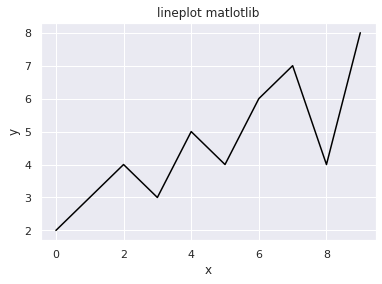

In [ ]:
plt.plot(x,y, color = 'black')
plt.title('lineplot matlotlib')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# seaborn 과 pyplot을 이용한 꺾은선 그래프
import seaborn as sns
sns.set()

Text(0, 0.5, 'y')

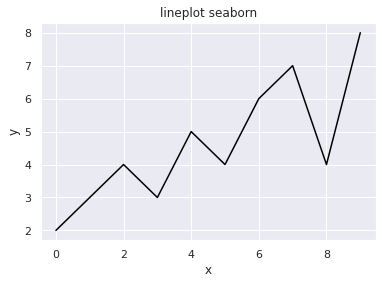

In [ ]:
plt.plot(x,y,color = 'black')
plt.title('lineplot seaborn')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

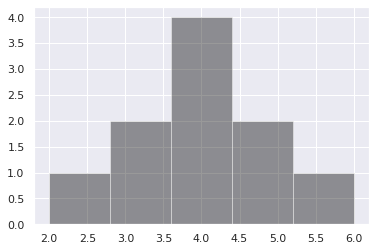

In [ ]:
sns.distplot(fish_data, bins = 5, color = 'black', kde = False)

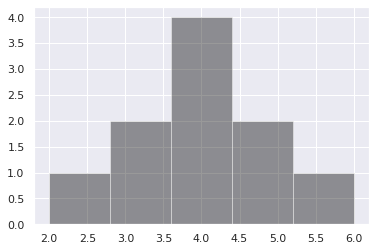

In [ ]:
# 커널밀도추정에 따른 히스토그램 평활화
sns.distplot(fish_data, bins = 5, color = 'black', kde = False)


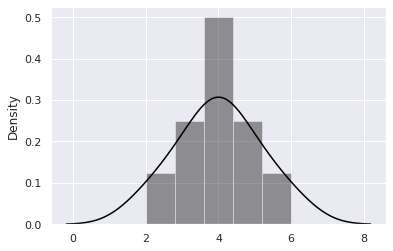

In [ ]:
sns.distplot(fish_data, bins = 5 ,color = 'black')

In [ ]:
# 2변량 데이터에 대한 히스토그램

fish_multi = pd.read_csv("/3-3-2-fish_multi_2.csv")
print(fish_multi)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [ ]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

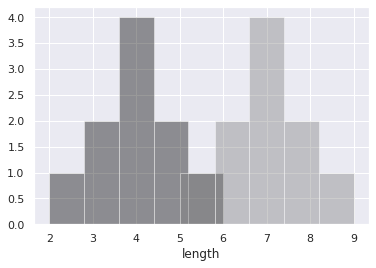

In [ ]:
length_a = fish_multi.query("species == 'A'")["length"]
length_b = fish_multi.query("species == 'B'")["length"]
sns.distplot(length_a, bins=5, color='black', kde=False)
sns.distplot(length_b, bins=5, color='gray', kde=False)

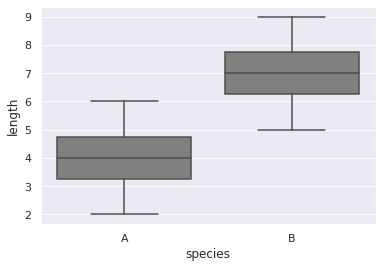

In [ ]:
sns.boxplot(x = 'species', y = 'length', data=fish_multi, color = 'gray')

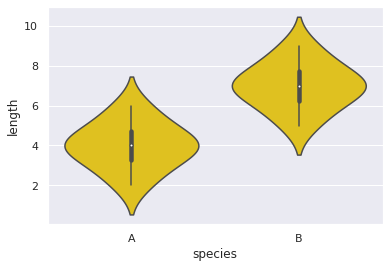

In [ ]:
# 바이올린플롯
sns.violinplot(x='species', y = 'length',
               data = fish_multi, color = 'gold')

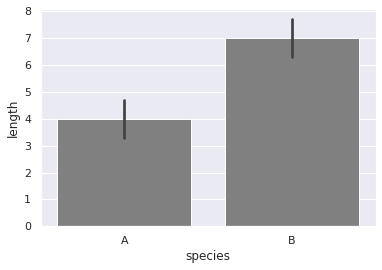

In [ ]:
# 막대그래프
sns.barplot(x='species', y='length',
            data = fish_multi, color = 'gray')

In [ ]:
# 산포도
csv_data = pd.read_csv("/3-2-3-cov.csv")
print(csv_data)


      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


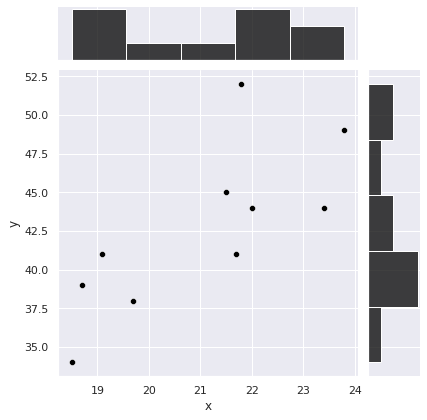

In [ ]:
sns.jointplot(x = "x", y = "y", data = cov_data, color = "black")

In [ ]:
iris = sns.load_dataset("iris")
iris.head(n=3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


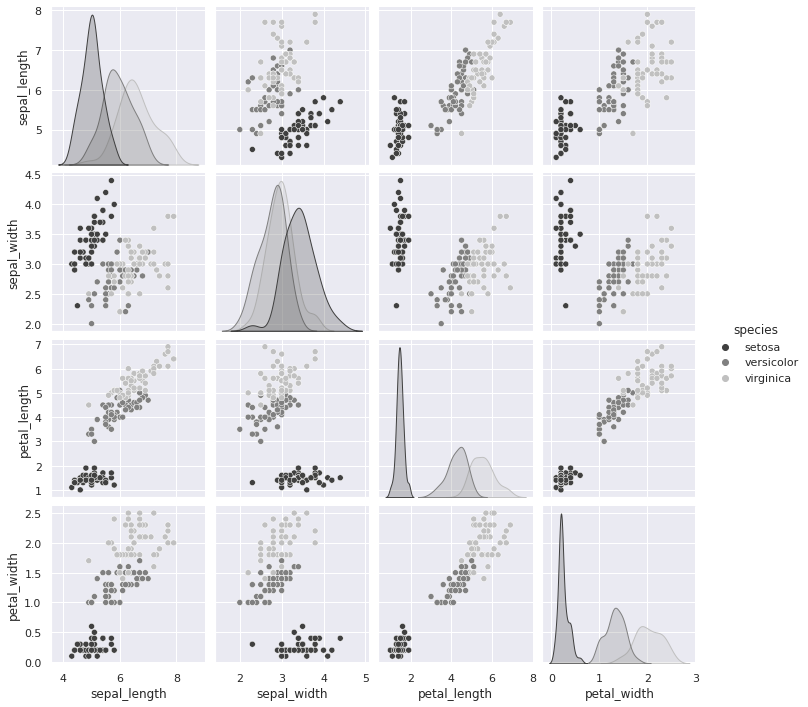

In [ ]:
sns.pairplot(iris, hue = "species", palette = "gray")

In [ ]:
# 수치계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as pyplot
import seaborn as sns
sns.set()
# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [ ]:
# 5마리 물고기의 예
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

In [ ]:
np.random.choice(fish_5, size = 1, replace = False)

array([2])

In [ ]:
np.random.choice(fish_5, size = 3, replace = False)

array([3, 5, 6])

In [ ]:
np.random.choice(fish_5, size = 3, replace = False)

array([3, 4, 6])

In [ ]:
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)

array([4, 3, 6])

In [ ]:
np.random.seed(1)
sp.mean(
    np.random.choice(fish_5, size=3, replace=False)
)

4.333

In [ ]:
# 더 많은 물고기가 있는 호수에서 표본추출

fish_100000 = pd.read_csv("/3-4-1-fish_length_100000.csv")['length']
fish_100000.head()

0    5.297441538044509457e+00
1    3.505566382962354677e+00
2    3.572546016717931039e+00
3    3.135979136966957181e+00
4    4.689275271100451725e+00
Name: length, dtype: object

In [ ]:
len(fish_100000)

158058

In [ ]:
sampling_result = np.random.choice(fish_100000, size = 10, replace = False)
sampling_result

array(['4.802272192971599907e+00', '4.302281398913267552e+00',
       '3.651706896133984248e+00', '3.765385005354930481e+00',
       '4.889313454172331319e+00', '3.603726134699903216e+00',
       '2.204909963545410800e+00', '3.672542210784313532e+00',
       '4.962386529919192490e+00', '4.877144719503292869e+00'],
      dtype=object)

In [ ]:
sp.mean(fish_100000)

TypeError: ignored

In [ ]:
sp.std(fish_100000, ddof = 1)

TypeError: ignored

In [ ]:
sp.var(fish_100000, ddof = 1)

TypeError: ignored

ValueError: ignored

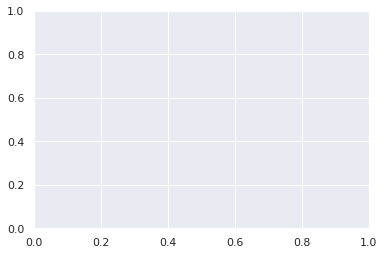

In [ ]:
sns.distplot(fish_100000, kde = False, color = 'black')

In [ ]:
# 모집단분포와 정규분포간 확률밀도함수 비교
# 평균 4, 분산 0.64인 정규분포의 확률밀도를 1~7 범위에서 표시해보겠습니다. 0.1단위로 해서 등차수열을 만듭니다.
x = np.arange(start=1, stop=7.1, step=0.1)
x

In [ ]:
#확률밀도는 stat.norm.pdf 함수를 사용해서 계산할 수 있습니다. 인수 loc이 평균값이고, scale 이 표준편차입니다.
stats.norm.pdf(x = x, loc = 4, scale = 0.8)

In [ ]:
plt.plot(x,
         stats.norm.pdf(x = x,loc = 4, scale = 0.8),
         color = 'black')

In [ ]:

sns.distplot(fish_100000, kde = False, norm_hist = True, color = 'black')
plt.plot(x, stats.norm.pdf(x=x, loc=4,scale=0.8),
         color='black')

In [ ]:
# 정규분포를 따르는 난수 생성 함수인 stats.norm.rvs 를 사용

sampling_norm = stats.norm.rvs(loc=4, scale=0.8, size=10)
sampling_norm

In [ ]:
sp.mean(sampling_norm)

In [ ]:
population = stats.norm(loc = 4, scale = 0.8)

In [ ]:
sample_mean_array = np.zeros(10000)

In [ ]:
# 배열에 10000개의 표본평균을 저장

np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

In [ ]:
# 10000개의 표본평균은 다음과 같음
sample_mean_array

In [ ]:
sp.mean(sample_mean_array)

In [ ]:
sp.std(sample_mean_array, ddof = 1)

In [ ]:
sns.distplot(sample_mean_array, color = 'black')

In [ ]:
# 샘플 사이즈가 크면, 표본평균은 모 평균에 가까워진다.
# 대상 : 표본평균, 변화시키는 것 : 샘플사이즈, 알고 싶은 것 : 샘플사이즈가 커질수록 표본평균은 모평균에 가까워지는가?

size_array = np.arange(start = 10, stop = 100100, step=100)
size_array

In [ ]:
# 표본평균을 저장할 변수 준비
sample_mean_array_size = np.zeros(len(size_array))
sample_mean_array_size

In [ ]:
# 표본평균을 구하는 시행을 샘플사이즈를 변화시켜가면서 몇 번이고 실행하게 됨

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

In [ ]:
# 가로축이 샘플사이즈, 세로축이 표본평균인 그래프를 그려보겠음

plt.plot(size_array, sample_mean_array_size, color = 'black')
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [ ]:
# 3.5.7 표본평균을 몇 번이고 계산하는 함수 만들기

def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial) # 시행횟수만큼 표본평균을 저장할 변수 준비
    for i in range(0, n_trial): # 반복문
        sample= population.rvs(size=size) # 평균 4, 표준편차가 0.8인 정규분포를 따르는 모집단에서 size만큼 표본을 추출
        sample_mean_array[i] = sp.mean(sample) # sample_mean_array 에 표본평균을 저장합니다.
    return(sample_mean_array) # n_trial 횟수만큼 계산한 표본평균을 돌려줌

In [ ]:
np.random.seed(1)
sp.mean(calc_sample_mean(size = 10, n_trial = 10000))

In [ ]:
# 샘플사이즈를 바꿨을 때 표본평균의 분산

np.random.seed(1)
#샘플사이즈 10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean" : size_10,
    "size" : np.tile("size 10", 10000)})
#샘플사이즈 20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean" : size_20,
    "size" : np.tile("size 20", 10000)})

#샘플사이즈 30
size_30 = calc_sample_mean(size=30, n_trial=10000)
size_30_df = pd.DataFrame({
    "sample_mean" : size_30,
    "size" : np.tile("size 30", 10000)
})
#종합
sim_result = pd.concat([size_10_df, size_20_df, size_30_df])
#결과 표시
print(sim_result.head())




In [ ]:
# 바이올린플롯

sns.violinplot(x = 'size', y='sample_mean',
               data = sim_result, color = 'gray')

In [ ]:
# 표본평균의 표준편차는 모집단보다 작다.
size_array = np.arange(start = 2, stop = 102, step = 2)
size_array

In [ ]:
# 표본평균의 표준편차를 저장할 변수 준비
sample_mean_std_array = np.zeros(len(size_array))

In [ ]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size = size_array[i], n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof = 1)

In [ ]:
plt.plot(size_array, sample_mean_std_array, color ='black')
plt.xlabel('sample size')
plt.ylabel('mean_std value')

In [ ]:
standard_error = 0.8 / np.sqrt(size_array)
standard_error

In [ ]:
plt.plot(size_array, sample_mean_std_array, color = 'black')
plt.plot(size_array, standard_error, color = 'black', linestyle = 'dotted')
plt.xlabel('sample size')
plt.ylabel('mean_std value')

In [ ]:
# 표본분산의 평균값은 모분산과 차이가 있다.
# 표본분산 저장할 변수 준비
sample_var_array = np.zeros(10000)

# 데이터 10개 골라서 표본분산을 구하는 시행을 10000번 반복
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 0)

In [ ]:
sp.mean(sample_var_array)

In [ ]:
#불편분산을 저장하는 변수
unbias_var_array = np.zeros(10000)
#데이터를 10개 골라서 불편분산을 구하는 시행을 10000번 반복
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof = 1)
# 불편분산의 평균값
sp.mean(unbias_var_array)

In [ ]:
# 샘플사이즈가 크면 불편분산은 모분산에 가까워진다.
size_array = np.arange(start = 10, stop = 100100, step = 100)
size_array

In [ ]:
unbias_var_array_size = np.zeros(len(size_array))

In [ ]:
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof = 1)

In [ ]:
plt.plot(size_array, unbias_var_array_size, color ='black')
plt.xlabel('sample size')
plt.ylabel('unbias var')

In [ ]:
# 불편성 : 추정량의 기댓값이 진짜 모수가 되는 특성
# 일치성 : 샘플사이즈가 커지면 추정량이 진짜 모수에 가까워지는 특성
# 중심극한정리 : 모집단의분포가 무엇이든 샘플의 사이즈가 커지면 확률변수의 합은 정규분포에 가까워짐

# 동전던지기 중심극한정리 증명
# 샘플사이즈와 시행횟수
n_size = 10000
n_trial = 50000
# 앞면이면 1, 뒷면이면 0으로 표시
coin = np.array([0,1])
# 앞면이 나온 횟수
count_coin = np.zeros(n_trial)
# 동전을 n_size 번 던지는 시행을 n_trial 번 수행
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = sp.sum(np.random.choice(coin, size = n_size, replace = True))
# 히스토그램 그리기
sns.distplot(count_coin, color = 'black')

In [ ]:
#수치계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
#그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
#표시 자릿수 지정
%precision 3
#그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [ ]:
sp.pi

3.142

In [ ]:
sp.exp(1)

2.718

In [ ]:
x = 3
mu = 4
sigma = 0.8



In [ ]:
#loc = 평균 scale = 표준편차

stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.228

In [ ]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x=3)

0.228

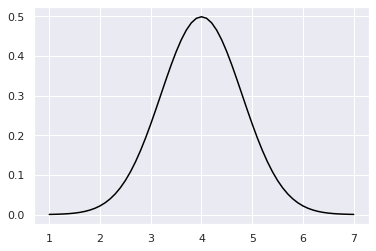

In [ ]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot,
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

In [ ]:
# 표본이 어떤 값 이하게 되는 비율
# 어떤 값 이하가 되는 데이터의 개수 / 샘플사이즈 계산

np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000
)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [ ]:
sp.sum(simulated_sample <= 3)

10371

In [ ]:
sp.sum(simulated_sample <= 3) / len(simulated_sample)

0.104

In [ ]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.106

In [ ]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.500

In [ ]:
# 데이터가 어떤 값 이하가 될 확률을 하측확률이라고 함 하측확률은 누적분포함수를 사용해서 구할 수 있습니다.
# 반대로 어떤 확률이 될 기준치를 퍼센트포인트라고 합니다. 하측퍼센트포인트라고 부르는 경우도 있습니다.
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.432

In [ ]:
# 하측확률과 퍼센트포인트는 다음과 같은 관계가 성립합니다.
lower = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q= lower)

3.000

In [ ]:
stats.norm.ppf(loc = 4, scale = 0.8, q= 0.5)

4.000

In [ ]:
# 난수 시드 설정
np.random.seed(1)
# t값을 저장할 변수 설정
t_value_array = np.zeros(10000)
# 정규분포 클래스의 인스턴스
norm_dist = stats.norm(loc = 4, scale = 0.8)
# 시뮬레이션 실행
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)

    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se




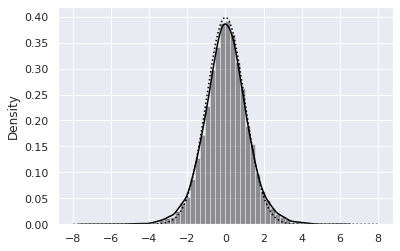

In [ ]:
# t값의 히스토그램
sns.distplot(t_value_array, color = 'black')
# 표준정규분포의 확률밀도
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), color = 'black', linestyle = 'dotted')

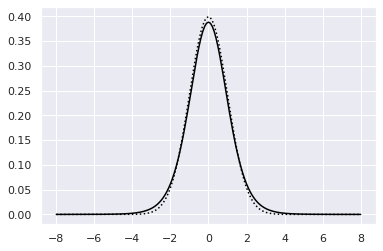

In [ ]:
plt.plot(x, stats.norm.pdf(x = x), color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x =x, df= 9), color = 'black')

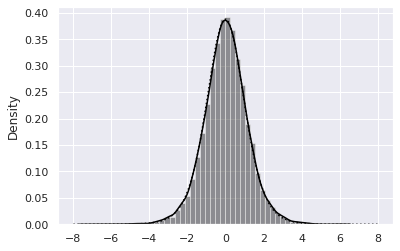

In [ ]:
sns.distplot(t_value_array, color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df= 9),
         color = 'black', linestyle = 'dotted')

In [ ]:
# 3.7 추정

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
#그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [ ]:
fish = pd.read_csv("/3-7-1-fish_length.csv")['length']

In [ ]:
len(fish)


10

In [ ]:
mu = sp.mean(fish)
mu

4.187

In [ ]:
sigma_2 = sp.var(fish, ddof = 1)
sigma_2

0.680

In [ ]:
df = len(fish) - 1
df

9

In [ ]:
# 표본오차 = 표준편차 (0.825) / 샘플의 크기에 루트 (3)

sigma = sp.std(fish, ddof = 1)
se = sigma / sp.sqrt(len(fish))
se

0.261

In [ ]:
interval = stats.t.interval(
    alpha = 0.95, df = df, loc = mu, scale = se)
interval


(3.597, 4.777)

In [ ]:
t_975 = stats.t.ppf(q=0.975, df= df)
t_975

2.262

In [ ]:
lower = mu -t_975 * se
lower

3.597

In [ ]:
upper = mu + t_975 * se
upper

4.777

In [ ]:
se2 = (sigma*10) / sp.sqrt(len(fish))
stats.t.interval(alpha = 0.95, df = df, loc = mu, scale = se2)

(-1.713, 10.087)

In [ ]:
df2 = (len(fish)*10) - 1
se3 = sigma / sp.sqrt(len(fish)*10)
stats.t.interval(alpha = 0.95, df = df2, loc = mu, scale = se3)

(4.023, 4.351)

In [ ]:
stats.t.interval(alpha = 0.99, df = df2, loc = mu, scale = se3)

(3.970, 4.404)

In [ ]:
be_included_array = np.zeros(20000, dtype = 'bool')
be_included_array

array([False, False, False, ..., False, False, False])

In [ ]:
# 95% 신뢰구간을 구하는 시행을 20000번 반복한다.
# 신뢰구간이 모평균(4) 를 포함하면 True

np.random.seed(1)
norm_dist = stats.norm(loc = 4, scale = 0.8)
for i in range(0, 20000):
    sample = norm_dist.rvs(size = 10)
    df = len(sample) - 1
    mu = sp.mean(sample)
    std = sp.std(sample, ddof = 1)
    se = std / sp.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True

In [ ]:
sum(be_included_array) / len(be_included_array)

0.948

In [ ]:
# 3.8.13 t검정의 구현 : 분석 준비
junk_food = pd.read_csv("/3-8-1-junk-food-weight.csv")['weight']
junk_food.head()


0    58.529820
1    52.353039
2    74.446169
3    52.983263
4    55.876879
Name: weight, dtype: float64

In [ ]:
mu = sp.mean(junk_food)
mu

55.385

In [ ]:
df = len(junk_food) - 1
df

19

In [ ]:
sigma = sp.std(junk_food, ddof = 1)
se = sigma / sp.sqrt(len(junk_food))
se

1.958

In [ ]:
t_value = (mu - 50) / se
t_value

2.750

In [ ]:
alpha = stats.t.cdf(t_value, df = df)
(1 - alpha) * 2

0.013

In [ ]:
stats.ttest_1samp(junk_food, 50)

Ttest_1sampResult(statistic=2.750339683171343, pvalue=0.012725590012524182)

In [ ]:
size = len(junk_food)
sigma = sp.std(junk_food, ddof = 1)

In [ ]:
t_value_array = np.zeros(50000)

In [ ]:
np.random.seed(1)
norm_dist = stats.norm(loc = 50, scale = sigma)
for i in range(0, 50000):
    sample = norm_dist.rvs(size = size)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)

    sample_se = sample_std / sp.sqrt(size)
    t_value_array[i] = (sample_mean - 50) / sample_se

In [291]:
(sum(t_value_array > t_value)/50000) * 2

0.013

In [292]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
#표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [294]:
paired_test_data = pd.read_csv('/3-9-1-paired-t-test.csv')
print(paired_test_data)

  person medicine  body_temperature
0      A   before              36.2
1      B   before              36.2
2      C   before              35.3
3      D   before              36.1
4      E   before              36.1
5      A    after              36.8
6      B    after              36.1
7      C    after              36.8
8      D    after              37.1
9      E    after              36.9


In [295]:
# 약을 먹기 전과 후의 표본평균
before = paired_test_data.query(
    'medicine == "before"')["body_temperature"]
after = paired_test_data.query(
    'medicine == "after"')["body_temperature"]
# 배열형으로 변환
before = np.array(before)
after = np.array(after)
# 차이 계산
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [296]:
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [297]:
stats.ttest_rel(after, before)

Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

In [299]:
# 평균값
mean_bef = sp.mean(before)
mean_aft = sp.mean(after)
# 분산
sigma_bef = sp.var(before, ddof = 1)
sigma_aft = sp.var(after, ddof = 1)
# 샘플사이즈
m = len(before)
n = len(after)
# t값
t_value = (mean_aft - mean_bef) / sp.sqrt((sigma_bef/m + sigma_aft/n))
t_value

3.156

In [307]:
stats.ttest_ind(after, before, equal_var = False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

In [308]:
1 - sp.stats.chi2.cdf(x = 6.667, df = 1)

0.010

In [310]:
click_data = pd.read_csv('/3-10-1-click_data.csv')
print(click_data)

  color  click  freq
0  blue  click    20
1  blue    not   230
2   red  click    10
3   red    not    40


In [312]:
cross = pd.pivot_table(
    data = click_data,
    values = 'freq',
    aggfunc = 'sum',
    index = 'color',
    columns = 'click'
)
print(cross)

click  click  not
color            
blue      20  230
red       10   40


In [313]:
sp.stats.chi2_contingency(cross, correction = False)

# 3장 코딩 끝

(6.667, 0.010, 1, array([[ 25., 225.],
        [  5.,  45.]]))